In [151]:
import numpy as np
import pandas as pd
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

url = "diagnosis_data.csv"

df = pd.read_csv(url)

In [152]:
df.head()

,a1,a2,a3,a4,a5,a6,d1,d2
0,Temperature of patient,occurrence of nausea,lumber pain,urine pushing,micturition pain,"burning of urethra, inch,swelling of urethra o...",inflammation of urinary bladder,nephritis of renal pelvis origin
1,"35,5",no,yes,no,no,no,no,no
2,"35,9",no,no,yes,yes,yes,yes,no
3,"35,9",no,yes,no,no,no,no,no
4,"36,0",no,no,yes,yes,yes,yes,no


In [153]:
df_name = df.iloc[0]
df_data = df.iloc[1:]

In [154]:
df_name

a1                               Temperature of patient
a2                                 occurrence of nausea
a3                                          lumber pain
a4                                        urine pushing
a5                                     micturition pain
a6    burning of urethra, inch,swelling of urethra o...
d1                      inflammation of urinary bladder
d2                     nephritis of renal pelvis origin
Name: 0, dtype: object

In [155]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 1 to 120
Data columns (total 8 columns):
a1    120 non-null object
a2    120 non-null object
a3    120 non-null object
a4    120 non-null object
a5    120 non-null object
a6    120 non-null object
d1    120 non-null object
d2    120 non-null object
dtypes: object(8)
memory usage: 7.6+ KB


In [156]:
df_data.head()

,a1,a2,a3,a4,a5,a6,d1,d2
1,"35,5",no,yes,no,no,no,no,no
2,"35,9",no,no,yes,yes,yes,yes,no
3,"35,9",no,yes,no,no,no,no,no
4,"36,0",no,no,yes,yes,yes,yes,no
5,"36,0",no,yes,no,no,no,no,no


In [157]:
# a1은 체온이기 때문에 35,5가 아닌 35.5 가 되여야 함으로, 이를 바꿔준다

dd= df_data["a1"].map(lambda x:x.replace(",","."))
df_data["a1"] = dd

C:\Users\Lee Joo Ye\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [158]:
df_data.head()

,a1,a2,a3,a4,a5,a6,d1,d2
1,35.5,no,yes,no,no,no,no,no
2,35.9,no,no,yes,yes,yes,yes,no
3,35.9,no,yes,no,no,no,no,no
4,36.0,no,no,yes,yes,yes,yes,no
5,36.0,no,yes,no,no,no,no,no


<Container object of 120 artists>

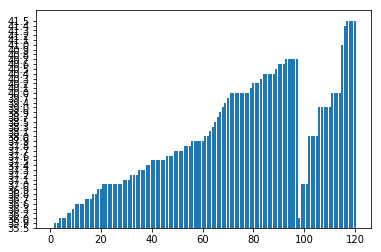

In [159]:
plt.bar(df_data.index,df_data.a1)

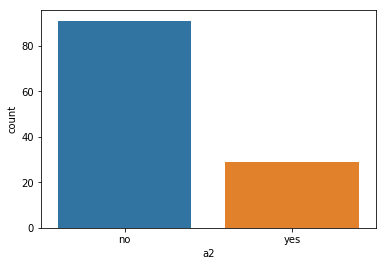

In [160]:
import seaborn as sns

sns.countplot(df_data["a2"],label = "count")

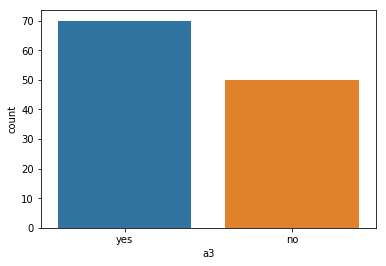

In [161]:
sns.countplot(df_data["a3"],label = "count")

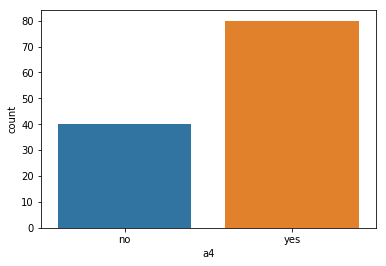

In [162]:
sns.countplot(df_data["a4"],label = "count")

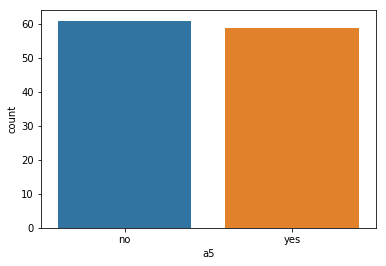

In [163]:
sns.countplot(df_data["a5"],label = "count")

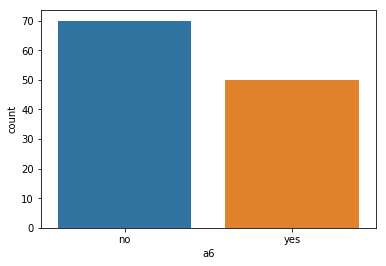

In [164]:
sns.countplot(df_data["a6"],label = "count")

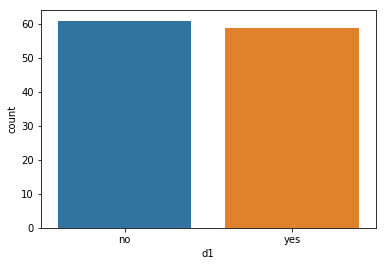

In [165]:
sns.countplot(df_data["d1"],label = "count")

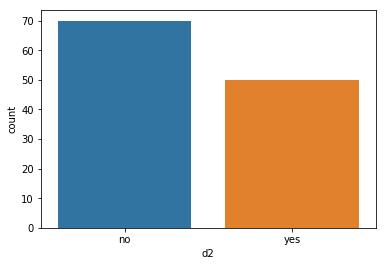

In [166]:
sns.countplot(df_data["d2"],label = "count")

In [167]:
from sklearn.tree import DecisionTreeClassifier



In [168]:
x_train = df_data[["a1","a2","a3","a4","a5","a6"]].loc[:84]
y_train = df_data[["d1","d2"]].loc[:84]

In [169]:
x_train.tail()

,a1,a2,a3,a4,a5,a6
80,40.2,yes,yes,yes,yes,yes
81,40.2,no,no,no,no,no
82,40.2,yes,yes,no,yes,no
83,40.3,no,yes,yes,no,yes
84,40.4,yes,yes,yes,yes,yes


In [170]:
y_train.tail()

,d1,d2
80,yes,yes
81,no,no
82,no,yes
83,no,yes
84,yes,yes


In [171]:
df_data1 = df_data.apply(lambda x: x.map({"yes":1,"no":0}),axis = 0)

In [172]:
df_data1.head()

,a1,a2,a3,a4,a5,a6,d1,d2
1,NaN,0,1,0,0,0,0,0
2,NaN,0,0,1,1,1,1,0
3,NaN,0,1,0,0,0,0,0
4,NaN,0,0,1,1,1,1,0
5,NaN,0,1,0,0,0,0,0


In [173]:
df_data1["a1"] = df_data["a1"]

In [174]:
df_data1.head()

,a1,a2,a3,a4,a5,a6,d1,d2
1,35.5,0,1,0,0,0,0,0
2,35.9,0,0,1,1,1,1,0
3,35.9,0,1,0,0,0,0,0
4,36.0,0,0,1,1,1,1,0
5,36.0,0,1,0,0,0,0,0


In [175]:
x_train1 = df_data1[["a1","a2","a3","a4","a5","a6"]].loc[:84]
y_train1 = df_data1[["d1","d2"]].loc[:84]
x_test1 = df_data1[["a1","a2","a3","a4","a5","a6"]].loc[84:]
y_test1 = df_data1[["d1","d2"]].loc[84:]

# 70% 를 test로 함

In [176]:
### decision tree 를 이용해 model 생성


from sklearn import tree

clf = DecisionTreeClassifier()
clf= clf.fit(x_train1,y_train1)

In [177]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# 자동으로 data set 분리
x_ori = df_data1[["a1","a2","a3","a4","a5","a6"]]
y_ori = df_data1[["d1","d2"]]
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )

# 데이터 표준화 작업

sc = StandardScaler()
sc.fit(x_train2)

# 표준화 된 dataset

x_train_std = sc.transform(x_train2)
x_test_ste = sc.transform(x_test2)

In [178]:
diagnosis_tree = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree.fit(x_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [179]:
# accuracy 구하기
from sklearn.metrics import accuracy_score

dia_predict = diagnosis_tree.predict(x_test2)
print('Accuracy: %.2f' % accuracy_score(y_test2, dia_predict))

Accuracy: 0.94


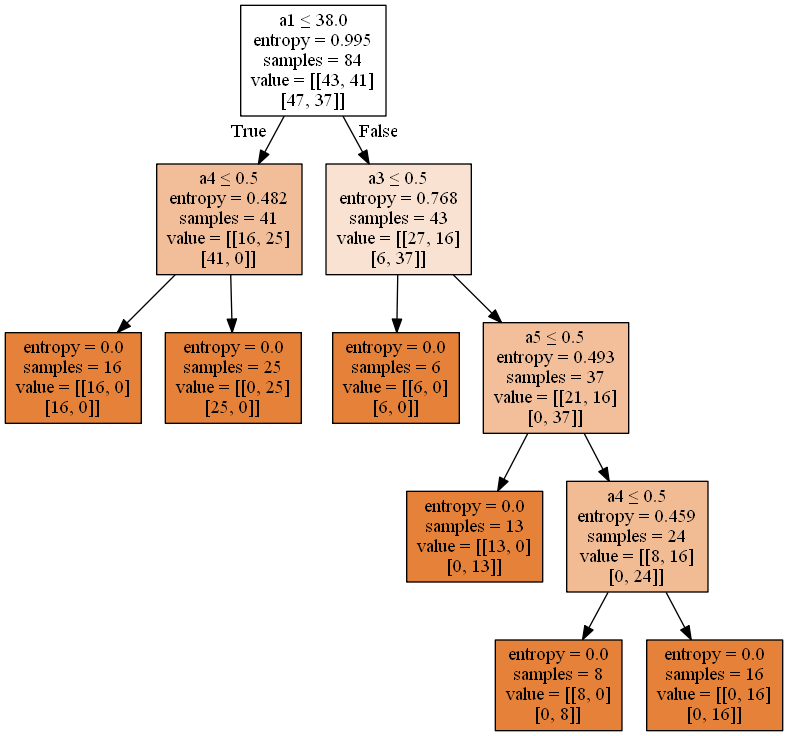

In [180]:
# 시각화 하기

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(diagnosis_tree, out_file = None, feature_names = ["a1","a2","a3","a4","a5","a6"], class_names = ["d1","d2"],filled = True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [181]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

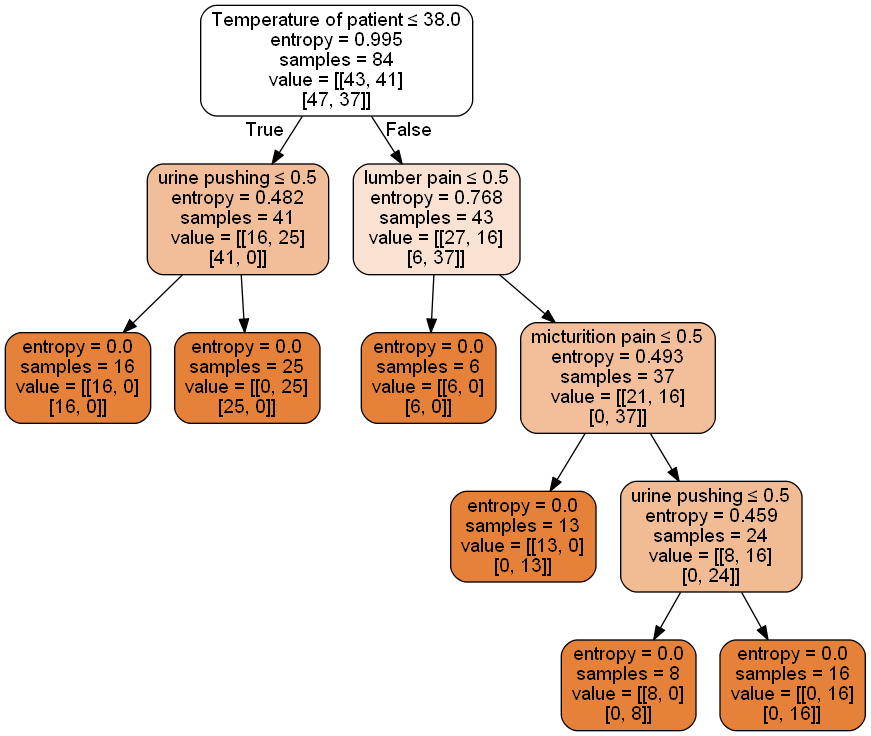

In [182]:
# 시각화 하기

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

a1 = df_name["a1"]
a2 = df_name["a2"]
a3 = df_name["a3"]
a4 = df_name["a4"]
a5 = df_name["a5"]
a6 = df_name["a6"]
d1 = df_name["d1"]
d2 = df_name["d2"]

dot_data = export_graphviz(diagnosis_tree, out_file = None, feature_names = [a1,a2,a3,a4,a5,a6], class_names = [d1,d2],filled = True,rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [183]:
### decision tree 를 이용해 model 생성


from sklearn import tree

clf = DecisionTreeClassifier()
clf= clf.fit(x_train1,y_train1)

In [184]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# 자동으로 data set 분리
x_ori = df_data1[["a1","a2","a3","a4","a5","a6"]]
y_ori1 = df_data1[["d1"]]
y_ori2 = df_data1[["d2"]]
x_train2,x_test2,y1_train2,y1_test2 = train_test_split(x_ori,y_ori1,test_size = 0.3,random_state =0 )
x_train2,x_test2,y2_train2,y2_test2 = train_test_split(x_ori,y_ori2,test_size = 0.3,random_state =0 )


In [185]:
diagnosis_tree1 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree1.fit(x_train2,y1_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [186]:
diagnosis_tree2 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree2.fit(x_train2,y2_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [187]:
# accuracy 구하기
from sklearn.metrics import accuracy_score

dia_predict1 = diagnosis_tree1.predict(x_test2)
print('d1:  Accuracy: %.2f' % accuracy_score(y1_test2, dia_predict1))

dia_predict2 = diagnosis_tree2.predict(x_test2)
print('d2:  Accuracy: %.2f' % accuracy_score(y2_test2, dia_predict2))

d1:  Accuracy: 1.00
d2:  Accuracy: 0.94


In [188]:
d1 = df_name["d1"]
d2 = df_name["d2"]

In [189]:
d1

'inflammation of urinary bladder'

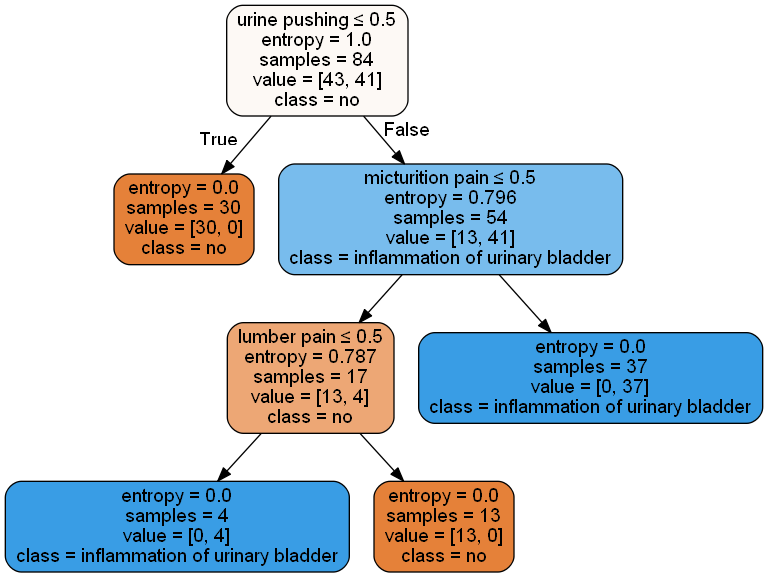

In [190]:
# 시각화 하기

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

a1 = df_name["a1"]
a2 = df_name["a2"]
a3 = df_name["a3"]
a4 = df_name["a4"]
a5 = df_name["a5"]
a6 = df_name["a6"]


dot_data = export_graphviz(diagnosis_tree1, out_file = None, feature_names = [a1,a2,a3,a4,a5,a6], class_names = ["no","inflammation of urinary bladder"],filled = True,rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [191]:
d2

'nephritis of renal pelvis origin'

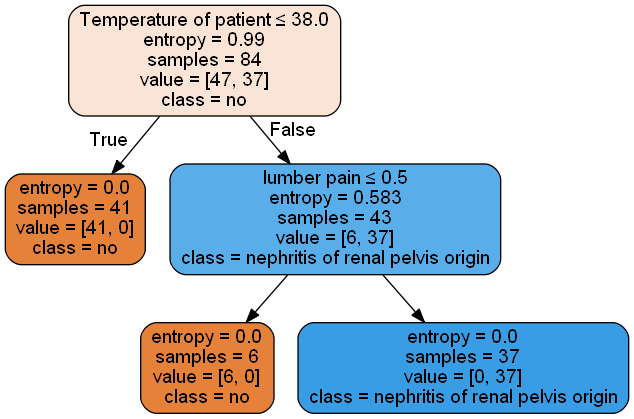

In [192]:
dot_data = export_graphviz(diagnosis_tree2, out_file = None, feature_names = [a1,a2,a3,a4,a5,a6], class_names = ["no",'nephritis of renal pelvis origin'],filled = True,rounded=True,special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [193]:
diagnosis_tree1 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree1.fit(x_train2,y1_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [194]:
df1 = df_data1.groupby(by = ["d2","d1"])

In [195]:
df1.size()

d2  d1
0   0     30
    1     40
1   0     31
    1     19
dtype: int64

In [196]:
df1.head()

,a1,a2,a3,a4,a5,a6,d1,d2
1,35.5,0,1,0,0,0,0,0
2,35.9,0,0,1,1,1,1,0
3,35.9,0,1,0,0,0,0,0
4,36.0,0,0,1,1,1,1,0
5,36.0,0,1,0,0,0,0,0
6,36.0,0,1,0,0,0,0,0
7,36.2,0,0,1,1,1,1,0
8,36.2,0,1,0,0,0,0,0
9,36.3,0,0,1,1,1,1,0
10,36.6,0,0,1,1,1,1,0


d2  d1
0   0     AxesSubplot(0.125,0.125;0.775x0.755)
    1     AxesSubplot(0.125,0.125;0.775x0.755)
1   0     AxesSubplot(0.125,0.125;0.775x0.755)
    1     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

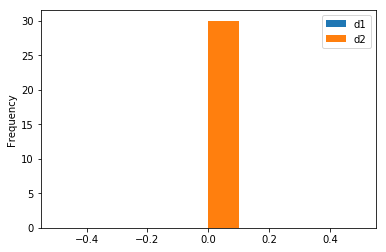

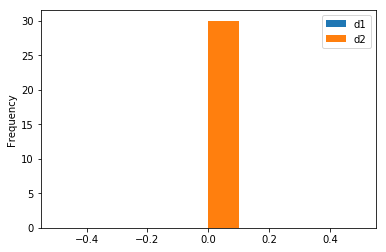

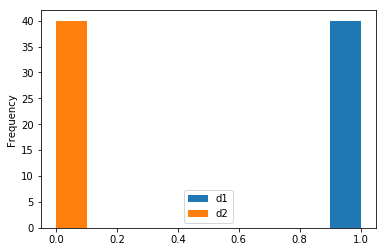

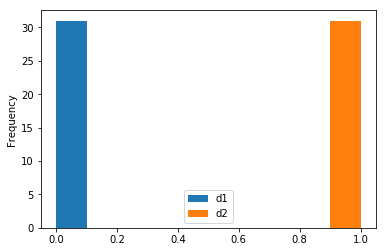

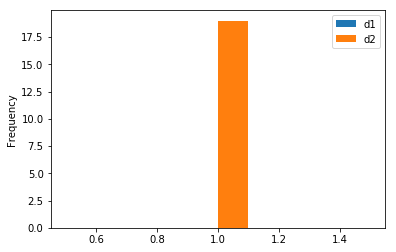

In [200]:
df1[["d1","d2"]].plot.hist()